# Exercícios: Agregação de Dados

### Indicadores Criminais do Rio Grande do Sul

#### Carga da Base de Dados Indicadores Criminais do Rio Grande do Sul

In [1]:
import pandas as pd
from pandas import DataFrame

arquivo = './data/df_crimesRS.json'

df_crimes = pd.read_json(arquivo)
df_crimes = df_crimes.drop(columns=['index','Total de vítimas de Homicidio Doloso','Vítimas de Latrocínio'])
df_crimes.head()

,Municípios,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte,ano
0,ACEGUA,1,0,65,18,1,5,1,4,2,0,0,0,2018
1,AGUA SANTA,0,0,31,3,3,0,2,2,1,0,1,0,2018
2,AGUDO,2,0,123,11,1,5,0,19,13,14,15,0,2018
3,AJURICABA,1,0,58,5,2,0,0,8,8,3,1,0,2018
4,ALECRIM,1,0,85,19,1,3,0,8,15,7,9,0,2018


#### Agregação: Qualidade dos Dados

A função groupby() permite agrupar os dados de diversas formas de maneira simples independentemente do formato largo ou longo dos dados.<br>
Elas podem ser muito úteis na hora de verificar a copletude da base, por meio da contagem de dados.<br>
Se necessário, consulte a documentação do método groupby(), no endereço: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Utilizando groupby, gere um DataFrame contendo o nome do município e a contagem de anos presentes na base.<br>
Utilize, em seguida, o método describe para verificar se há dados para todos os municípios referente aos período de 2022-2012.<br>

In [4]:
df_contagem = df_crimes[['ano','Municípios']].groupby('Municípios').count()
df_contagem.describe()
df_contagem.head()

,ano
Municípios,
ACEGUA,11
AGUA SANTA,11
AGUDO,11
AJURICABA,11
ALECRIM,11


Liste os municípios que possuem menos de 11 registros presentes na base de dados.

In [6]:
df_contagem[df_contagem.ano <11]

,ano
Municípios,
SANTA TEREZA,9
SANTA tereza,2


Corrija os dados no DataFrame original e verifique o resultado por meio da função de agrupamento.

In [10]:
df_crimes['Municípios'] = df_crimes['Municípios'].str.upper()
df_contagem = df_crimes[['ano','Municípios']].groupby('Municípios').count()
df_contagem[df_contagem.ano <11]

,ano
Municípios,


#### Agregações - Crimes no RS

Utilizando a função groupby(), gere um DataFrame com a quantidade de cada crime nos municípios em todo o período.<br>
Certifique-se de eliminar a coluna 'ano' do resultado.
Compare com o procedimento utilizado no exercío da aula 09, Tramento de Dados.

In [52]:
df_crimes_municípios = df_crimes[df_crimes.columns[:-1]].groupby('Municípios').sum()
df_crimes_municípios.head()

,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte
Municípios,,,,,,,,,,,,
ACEGUA,5,0,537,232,10,16,3,82,30,3,0,0
AGUA SANTA,2,0,384,64,33,30,8,56,35,2,4,0
AGUDO,11,1,1458,92,37,68,2,293,78,64,80,0
AJURICABA,2,0,475,32,21,10,2,106,52,42,10,1
ALECRIM,9,0,746,155,11,13,1,82,76,43,26,0


Vamos verificar se o comportamento observado na quantidade de crimes de estelionato, furto e roubo de veículos em Porto Alegre se repete em todo o Estado.<br>
Primeiro, agrupe os dados por ano e realize a soma para todos os municípios.

In [11]:
df_crimes_ano = df_crimes[df_crimes.columns[1:]].groupby('ano').sum()
df_crimes_ano.head()

,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte
ano,,,,,,,,,,,,
2012,2026,92,164275,6989,15689,46528,12059,18609,7252,14562,9351,56
2013,1941,132,166808,6881,16886,52832,11989,18201,7476,16557,10111,40
2014,2377,145,170360,7445,18956,62273,13754,18712,7888,14959,9942,51
2015,2479,144,163431,9319,20420,80588,18138,18461,7688,12201,9176,33
2016,2666,169,160873,10478,19541,88465,17614,18260,7861,10957,8914,27


A partir do DataFrame agrupado, gere um novo gráfico de linha com as quantidades anuais dos crimes de estelionato, furto e roubo de veículos.<br>
Compare com o gráfico gerado no exercício anterior para a Cidade de Porto Alegre.

<Axes: xlabel='ano'>

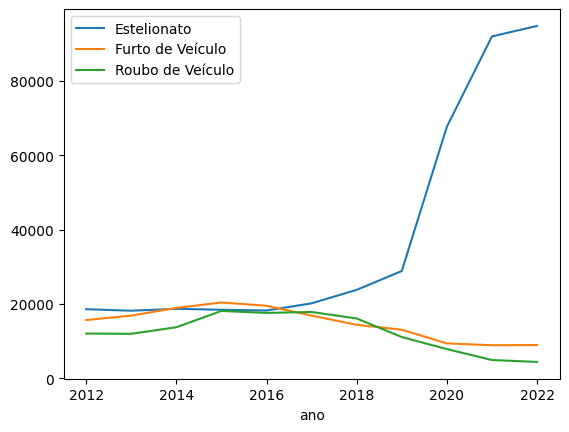

In [39]:
df_crimes_ano[['Estelionato','Furto de Veículo','Roubo de Veículo']].plot()

#### Agregações - Crimes por Região do RS

Ao invés de comparar municípios, pode fazer sentido avaliar os índices de criminalidade por unidades geográficas maiores, como as regiões imeditas, definidas pelo IBGE para com objetivo agrupar municípios vizinhos que possuam uma integração socioeconômica e funcional mais próxima, facilitando assim a análise de dados e a compreensão da dinâmica regional.
Para isso, vamos fazer a junção do DataFrame df_crimes com uma tabela de definição de regiões e agrupar os dados pelas regiões.

##### <<< Desafio Opcional  - Obtenção dos Dados das Regiões>>>

O IBGE disponibiliza os dados de municípios e suas microrregiões e regiões imediatas do RS por meio de uma API no endereço<br>
https://servicodados.ibge.gov.br/api/v1/localidades/estados/43/municipios<br>
Utilizando a função request.get(), obtenha os dados e prepare-os de forma a possibilitar a junção dos mesmos com a DataFrame df_crimes.<br>
Dica: utilize a função limpa_texto() do exercício da aula do dia 09.

In [ ]:
# import requests
# import unicodedata

# def limpa_texto(texto='',*kword):
#     nfkd_form = unicodedata.normalize('NFKD', texto)
#     only_ascii = nfkd_form.encode('ASCII', 'ignore').decode("utf-8")
#     texto = only_ascii.upper()
#     return texto

# df_rs = DataFrame(requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/estados/43/municipios').json())
# df_rs['regiao-imediata'] = df_rs['regiao-imediata'].apply(lambda coluna: coluna['nome'])
# df_rs['microrregiao'] = df_rs['microrregiao'].apply(lambda coluna: coluna['nome'])
# df_rs['nome']=df_rs['nome'].apply(lambda coluna: limpa_texto(coluna))
# df_rs.to_json('df_rs_regioes.json')

##### Carga e Junção de Dados

Caso não tenha realizado o desafio opcional, carregue os dados das regiões do RS com o comando abaixo e faça a junção com a tabela df_crimes.

In [12]:
df_rs = pd.read_json('./data/df_rs_regioes.json')
df_rs

,id,nome,microrregiao,regiao-imediata
0,4300034,ACEGUA,Campanha Meridional,Bagé
1,4300059,AGUA SANTA,Passo Fundo,Tapejara - Sananduva
2,4300109,AGUDO,Restinga Seca,Santa Maria
3,4300208,AJURICABA,Ijuí,Ijuí
4,4300307,ALECRIM,Santa Rosa,Santa Rosa
...,...,...,...,...
492,4323606,VISTA ALEGRE DO PRATA,Guaporé,Nova Prata - Guaporé
493,4323705,VISTA GAUCHA,Três Passos,Três Passos
494,4323754,VITORIA DAS MISSOES,Santo Ângelo,Santo Ângelo
495,4323770,WESTFALIA,Lajeado-Estrela,Lajeado


Faca a junção da tabela de crimes com a tabela de microregião.

In [13]:
df_crimes2 = pd.merge(left=df_crimes,right=df_rs,left_on='Municípios',right_on='nome').drop(columns=['nome','id'])
df_crimes2.head()

,Municípios,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte,ano,microrregiao,regiao-imediata
0,ACEGUA,1,0,65,18,1,5,1,4,2,0,0,0,2018,Campanha Meridional,Bagé
1,ACEGUA,0,0,26,8,0,1,1,4,1,0,0,0,2019,Campanha Meridional,Bagé
2,ACEGUA,0,0,48,20,2,4,1,6,2,0,0,0,2017,Campanha Meridional,Bagé
3,ACEGUA,0,0,61,21,3,2,0,2,2,0,0,0,2016,Campanha Meridional,Bagé
4,ACEGUA,0,0,59,27,2,1,0,1,0,0,0,0,2015,Campanha Meridional,Bagé


##### Agregação: Crimes x Região-Intermediária

Finalmente, utilizando a função groupby(), calcule a quantidade de crime por região-itermediária.
Liste as 5 regiões-imediadas com o maior número de homicídios dolosos.

In [14]:
df_crimes_regiao = df_crimes2[df_crimes2.columns[1:]].drop(columns=['ano','microrregiao']).groupby('regiao-imediata').sum()
df_crimes_regiao.nlargest(5,'Homicídio  Doloso')

,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte
regiao-imediata,,,,,,,,,,,,
Porto Alegre,10696,401,535632,6724,64336,436084,97732,163742,19785,49816,51346,144
Novo Hamburgo - São Leopoldo,1698,85,114183,1558,20072,53687,16304,32310,4388,14412,9148,21
Pelotas,1433,101,112678,8031,9121,53553,2676,25159,5704,7520,9047,30
Caxias do Sul,1309,86,95070,2077,16779,29934,7690,35683,4456,7560,6139,18
Tramandaí - Osório,742,26,70756,1740,4839,11454,1298,13245,1706,5750,5545,15


Faça um gráfico de pizza para mostrar como estão distribuídos os homicídios nas 10 maiores regiões-imediatas do Rio Grande do Sul.

<Axes: ylabel='Homicídio  Doloso'>

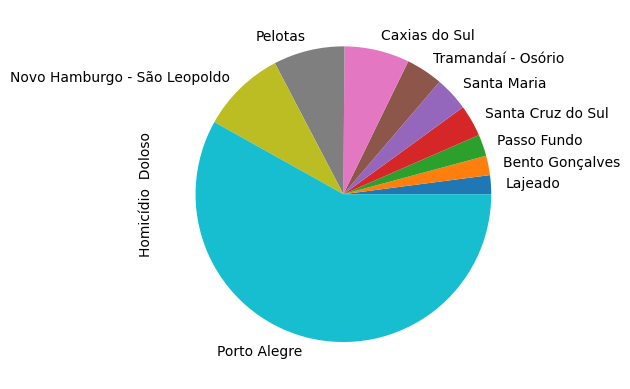

In [15]:
df_crimes_regiao.nlargest(10,'Homicídio  Doloso').sort_values('Homicídio  Doloso').plot(kind='pie',y='Homicídio  Doloso',legend=False,)

##### População Por Região

Leia o arquivo './data/pop_rs.json' e, por meio de uma junção com o DataFrame df_rs através das colunas "Código" e "id", calcule a população em 2022 de cada região-intermediária do RS.

In [16]:
pop_rs = pd.read_json('./data/pop_rs.json')
pop_rs2 = pd.merge(left=pop_rs,right=df_rs,left_on='Código',right_on='id')
pop_regiao_inter = pop_rs2.groupby('regiao-imediata')[['2022']].sum()
pop_regiao_inter.head()

,2022
regiao-imediata,
Bagé,189050.0
Bento Gonçalves,239099.0
Cachoeira do Sul,93959.0
Camaquã,125712.0
Carazinho,147053.0


##### Taxa de Homicídio Por Região

Por fim, utilize os dados populacionais para calcular a taxa de homicídio/100.000 habitantes por região, levando em conta a população de 2022.<br>
Exiba a taxa para cada região em um gráfico de barras horizontal, ordenado por taxa de homicídio.

<Axes: title={'center': 'Taxa de Homicídio x Região-Intermediária'}, ylabel='regiao-imediata'>

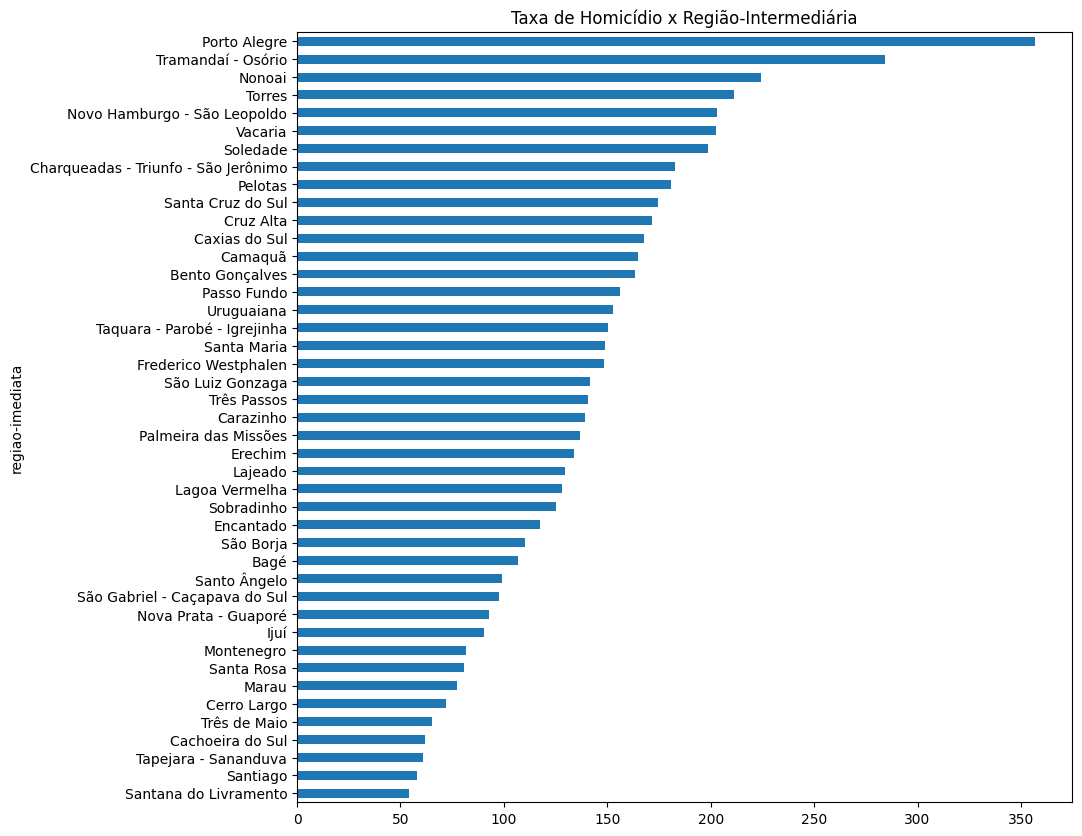

In [17]:
df_crimes_regiao['taxa homicídio'] = 100_000*df_crimes_regiao['Homicídio  Doloso']/pop_regiao_inter['2022']
df_crimes_regiao['populacao']=pop_regiao_inter['2022']
df_crimes_regiao.sort_values('taxa homicídio').plot.barh(y='taxa homicídio',figsize=(10,10),title='Taxa de Homicídio x Região-Intermediária',legend=False)

##### Regressão Linear: Taxa de Homicídios x População

Inicialmente, plote dois gráficos de dispersão das variáveis população e taxa de homicídio utilizando o método lmplot do Seaborn, o primeiro com os dados completos e o segundo excluindo a região de Porto Alegre.

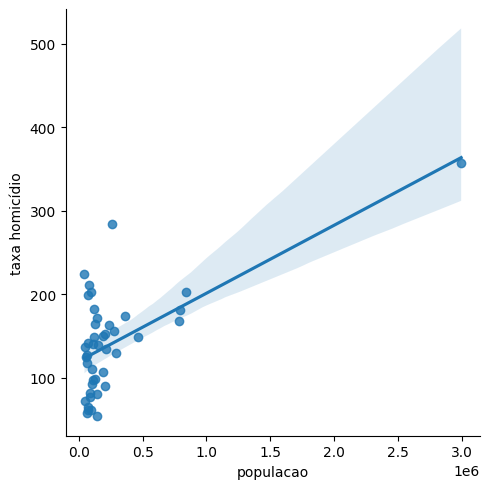

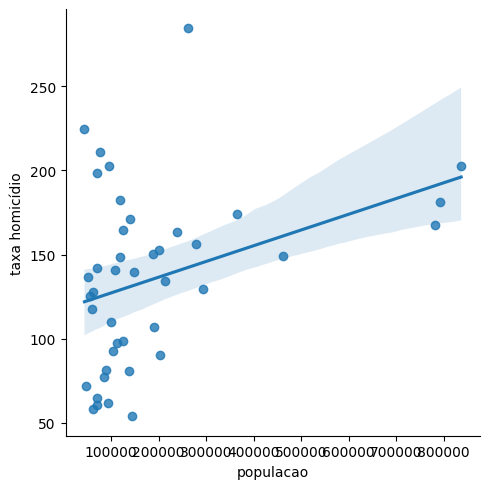

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=df_crimes_regiao,
               x='populacao', y='taxa homicídio',)
sns.lmplot(data=df_crimes_regiao[df_crimes_regiao.index!='Porto Alegre'],
               x='populacao', y='taxa homicídio')

Utilizando o módulo statsmodels, faça uma regressão linear para avaliar o possível efeito do tamanho da população na taxa de homicídios nas regiões do RS.

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_regressao = df_crimes_regiao[['taxa homicídio','populacao']]
df_regressao = df_regressao.rename(columns={'taxa homicídio':'taxa_hom'})
tl_model = smf.ols("taxa_hom ~ populacao", data=df_regressao).fit()
tl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               taxa_hom   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     25.82
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.64e-06
Time:                        10:13:19   Log-Likelihood:                -227.05
No. Observations:                  43   AIC:                             458.1
Df Residuals:                      41   BIC:                             461.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.0195      8.454     14.197      0.000     102.947     137.092
populacao   8.124e-05    1.6e-05      5.081      0.000     4.9e-05       0.000
==============================================================================
Omnibus:                        5.770   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.533
Skew:                           0.739   Prob(JB):                        0.104
Kurtosis:                       3.586   Cond. No.                     6.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Execute novamente a regressaão, excluindo a região de Porto Alegre, e compare os resultados.

In [47]:
tl_model = smf.ols("taxa_hom ~ populacao", data=df_regressao[df_regressao.index!='Porto Alegre']).fit()
tl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               taxa_hom   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     5.598
Date:                Mon, 16 Oct 2023   Prob (F-statistic):             0.0229
Time:                        10:13:26   Log-Likelihood:                -222.21
No. Observations:                  42   AIC:                             448.4
Df Residuals:                      40   BIC:                             451.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.9160     10.603     11.121      0.000      96.487     139.345
populacao    9.33e-05   3.94e-05      2.366      0.023    1.36e-05       0.000
==============================================================================
Omnibus:                        5.710   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.519
Skew:                           0.764   Prob(JB):                        0.104
Kurtosis:                       3.496   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Preços Combustíveis

#### Carga da Base de Dados Combustíveis

In [120]:
df_combustiveis = pd.read_csv('./data/precos-gasolina-etanol-01.csv',sep=';')
df_combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,"3,89",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,02/01/2023,"5,14",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,02/01/2023,"5,14",NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,ETANOL,02/01/2023,"3,79",NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,02/01/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA


Utilize a função groupby() para contar quantos municípios por Unidade da Federação estão presentes na base.

In [121]:
df_combustiveis[['Municipio','Estado - Sigla']].drop_duplicates().groupby('Estado - Sigla')[['Municipio']].count()

,Municipio
Estado - Sigla,
AC,1
AL,4
AM,4
AP,1
BA,22
CE,10
DF,1
ES,8
GO,15


Utilize a função groupby() para calcular os preços máximo, médio e mínimo do valor de venda gasolina não aditivada por Unidade da Federação:

In [122]:
df_combustiveis['Valor de Venda'] = df_combustiveis['Valor de Venda'].str.replace(',', '.').astype(float)
df_combustiveis[['Estado - Sigla','Valor de Venda']].groupby('Estado - Sigla').agg({'Valor de Venda': ['max', 'min', 'mean']})

Valor de Venda                
                          max   min      mean
Estado - Sigla                               
AC                       5.58  4.15  5.068214
AL                       6.95  3.59  4.856241
AM                       6.00  3.75  4.826205
AP                       5.50  4.44  4.659000
BA                       7.00  3.79  5.184907
CE                       6.89  3.99  5.248424
DF                       5.89  3.49  4.660273
ES                       6.19  3.89  4.984640
GO                       6.99  3.17  4.477939
MA                       6.09  3.57  4.837115
MG                       5.99  3.29  4.598810
MS                       5.93  3.55  4.635018
MT                       5.79  3.15  4.496916
PA                       6.19  3.95  5.086431
PB                       5.29  3.56  4.451548
PE                       6.19  3.50  4.688742
PI                       5.99  3.89  4.970630
PR                       6.09  3.49  4.778095
RJ                       6.69  3.79  4.942437
RN                       5.79  3.75  4.902202
RO                       6.37  4.19  5.189832
RR                       5.87  4.79  5.405301
RS                       6.79  3.99  5.012172
SC                       6.69  3.89  5.080158
SE                       5.42  3.74  4.768035
SP                       8.19  3.06  4.609767
TO                       6.39  3.99  4.994000

Utilize a função groupby() para calcular os preços máximo, médio e mínimo do valor de venda gasolina nos diferentes bairros do Distrito Federal.
Imprima os 5 bairros com os menores preços.

In [137]:
df_combustiveis_bsb= df_combustiveis[df_combustiveis['Estado - Sigla']=='DF']
df_combustiveis_bsb[['Bairro','Valor de Venda']].groupby('Bairro').agg({'Valor de Venda': ['max', 'min', 'mean']}).nsmallest(5,('Valor de Venda','min'))

Valor de Venda                
                                        max   min      mean
Bairro                                                     
CEILANDIA                              5.29  3.49  4.501477
TAGUATINGA                             5.49  3.49  4.584842
SETOR INDUSTRIAL (CEILANDIA)           4.84  3.57  4.364444
AGUAS CLARAS                           5.49  3.65  4.668846
SETOR CENTRAL (GAMA)                   5.14  3.68  4.614444